In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-emotion-recognition/emotions.csv
/kaggle/input/facial-emotion-recognition/images/7/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/7/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/7/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/7/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/7/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/7/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/7/Fear.jpg
/kaggle/input/facial-emotion-recognition/images/7/Contempt.jpg
/kaggle/input/facial-emotion-recognition/images/17/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/17/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/17/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/17/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/17/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/17/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/17/Fear.jpg
/kaggle/input/facial-emoti

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

2025-10-03 11:58:44.498391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759492724.839900      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759492724.931039      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
df = pd.read_csv('/kaggle/input/facial-emotion-recognition/emotions.csv')
df.head()

,set_id,gender,age,country
0,0,FEMALE,36,RU
1,1,FEMALE,37,RU
2,2,FEMALE,36,RU
3,3,MALE,29,RU
4,4,FEMALE,43,RU


In [5]:
df.columns

Index(['set_id', 'gender', 'age', 'country'], dtype='object')

In [6]:
# Set the image base path
img_base_path = '/kaggle/input/facial-emotion-recognition/images'

# Load images and extract labels from subfolder names (e.g., Anger.jpg inside folder 0 means label = 'Anger')
images, labels = [], []

for i, row in df.iterrows():
    folder_path = os.path.join(img_base_path, str(i))
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.jpg'):
                label = file.replace('.jpg', '')  # Get emotion label from filename
                path = os.path.join(folder_path, file)
                img = Image.open(path).resize((48, 48)).convert('L')  # Convert to grayscale
                images.append(np.array(img))
                labels.append(label)

In [7]:
# Convert image list to NumPy array and normalize
X = np.array(images) / 255.0
X = X.reshape(-1, 48, 48, 1)

In [8]:
# Encode labels to numbers, then to one-hot vectors
le = LabelEncoder()
y = le.fit_transform(labels)
y = tf.keras.utils.to_categorical(y)

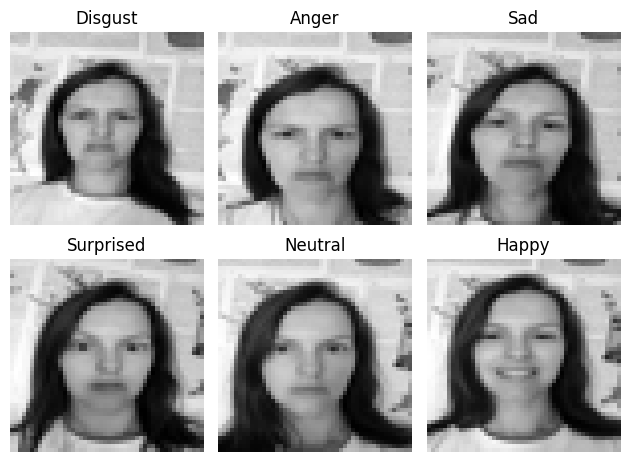

In [9]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X[i].reshape(48, 48), cmap='gray')
    plt.title(le.inverse_transform([np.argmax(y[i])])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2025-10-03 11:59:27.818727: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,000 (1.64 MB)

 Trainable params: 429,000 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.0937 - loss: 2.1283 - val_accuracy: 0.0645 - val_loss: 2.1079
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1187 - loss: 2.0815 - val_accuracy: 0.0645 - val_loss: 2.0847
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1416 - loss: 2.0741 - val_accuracy: 0.0645 - val_loss: 2.0859
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1536 - loss: 2.0741 - val_accuracy: 0.0645 - val_loss: 2.0886
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2821 - loss: 2.0688 - val_accuracy: 0.0323 - val_loss: 2.0944
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1869 - loss: 2.0638 - val_accuracy: 0.0645 - val_loss: 2.1021
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2563 - loss: 2.0512 - val_accuracy: 0.0000e+00 - val_loss: 2.1176
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2402 - loss: 2.0503 - val_accuracy: 0.0323 - val_loss: 2.

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", round(test_acc * 100, 2), "%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 2.1702
Test Accuracy: 0.0 %


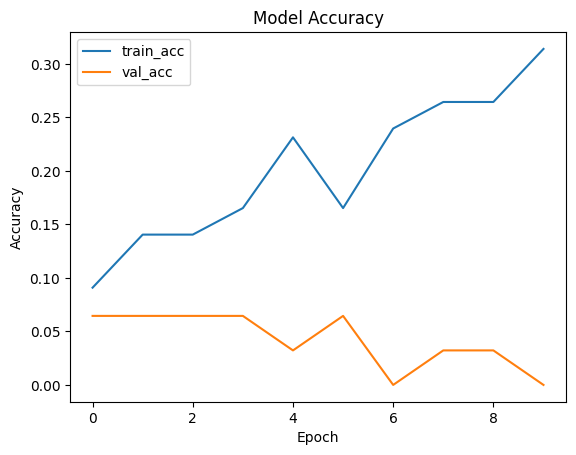

In [14]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

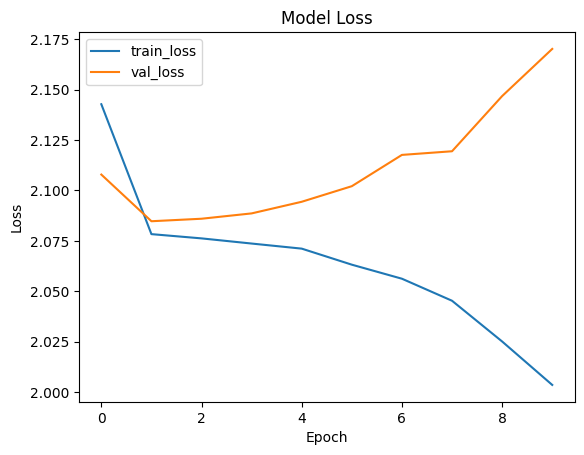

In [15]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()